In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('/Users/anikbanik/Downloads/hotel_booking.csv')
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Summery Statistic of Numerical Variable

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


# Summery statictics of Catagorical Variable

In [5]:
df.describe(include= 'object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


# Data Preprocessing

# Remove Directly Related Feature 

In [6]:
df = df.drop(columns =['reservation_status', 'reservation_status_date'])
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,Linda Hines,LHines@verizon.com,713-226-5883,************5498


# Drop Irrelevant Features

In [7]:
df['arrival_date_year'].value_counts()

arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64

In [8]:
df = df.drop(columns =['arrival_date_year','assigned_room_type'])


# Engineer and Drop High-Cardinality Features

# Create a dataframe with the number of unique categories and missing values for each high-cardinality feature

In [9]:
high_cardinality_features = ['country', 'agent', 'company', 'name', 'email', 'phone-number', 'credit_card']
unique_categories = df[high_cardinality_features].nunique()
missing_values = df[high_cardinality_features].isnull().sum()

# Combine the two series into a single dataframe

In [10]:
high_cardinality_df = pd.DataFrame({'Unique_Categories': unique_categories, 'Missing_Values': missing_values})
high_cardinality_df

,Unique_Categories,Missing_Values
country,177,488
agent,333,16340
company,352,112593
name,81503,0
email,115889,0
phone-number,119390,0
credit_card,9000,0


# Feature engineering for name feature

In [11]:
df['booking_per_guest'] = df.groupby('name')['name'].transform('count')
df[['booking_per_guest']].head()

,booking_per_guest
0,1
1,2
2,3
3,1
4,1


# Drop the original 'name' feature and other high-cardinality features

In [12]:
df= df.drop(columns =['name', 'country', 'agent', 'company', 'email', 'phone-number', 'credit_card'])

In [13]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,booking_per_guest
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,...,0,C,3,No Deposit,0,Transient,0.0,0,0,1
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,...,0,C,4,No Deposit,0,Transient,0.0,0,0,2
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,0,A,0,No Deposit,0,Transient,75.0,0,0,3
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,0,A,0,No Deposit,0,Transient,75.0,0,0,1
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,0,A,0,No Deposit,0,Transient,98.0,0,1,1


# Handling Missing Values

In [14]:
df.isnull().sum()/ len(df)*100

hotel                             0.00000
is_canceled                       0.00000
lead_time                         0.00000
arrival_date_month                0.00000
arrival_date_week_number          0.00000
arrival_date_day_of_month         0.00000
stays_in_weekend_nights           0.00000
stays_in_week_nights              0.00000
adults                            0.00000
children                          0.00335
babies                            0.00000
meal                              0.00000
market_segment                    0.00000
distribution_channel              0.00000
is_repeated_guest                 0.00000
previous_cancellations            0.00000
previous_bookings_not_canceled    0.00000
reserved_room_type                0.00000
booking_changes                   0.00000
deposit_type                      0.00000
days_in_waiting_list              0.00000
customer_type                     0.00000
adr                               0.00000
required_car_parking_spaces       

In [15]:
df['children'].value_counts()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [16]:
df['children'] = df['children'].fillna(0)
df['children'].isnull().sum()

np.int64(0)

# Handling Noisy Data

In [17]:
# Replace negative adr with median of adr column
df.loc[df['adr'] <0, 'adr'] = df['adr'].median()

In [18]:
# Remove rows with 0 adults
df= df[df['adults'] !=0]


In [19]:
# Remove rows with 10 children or 10 babies
df= df[df['children'] !=10]
df= df[df['babies'] !=10]

In [20]:
# Reset the index
df.reset_index(drop=True, inplace=True)

# Encode Categorical Variables

In [21]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces       

In [22]:
# Convert 'arrival_date_month' to numerical values
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: months.index(x) + 1)

In [23]:
# One-hot encode the specified columns (Nominal variables)
one_hot_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118985 entries, 0 to 118984
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118985 non-null  int64  
 1   lead_time                       118985 non-null  int64  
 2   arrival_date_month              118985 non-null  int64  
 3   arrival_date_week_number        118985 non-null  int64  
 4   arrival_date_day_of_month       118985 non-null  int64  
 5   stays_in_weekend_nights         118985 non-null  int64  
 6   stays_in_week_nights            118985 non-null  int64  
 7   adults                          118985 non-null  int64  
 8   children                        118985 non-null  float64
 9   babies                          118985 non-null  int64  
 10  is_repeated_guest               118985 non-null  int64  
 11  previous_cancellations          118985 non-null  int64  
 12  previous_booking

# Checking Imbalance Data

/var/folders/p6/rvyykhys5d7fjdf4q2r8mzrm0000gn/T/ipykernel_23823/4092724817.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= percentage.index, y= percentage, palette=['blue', 'green'])


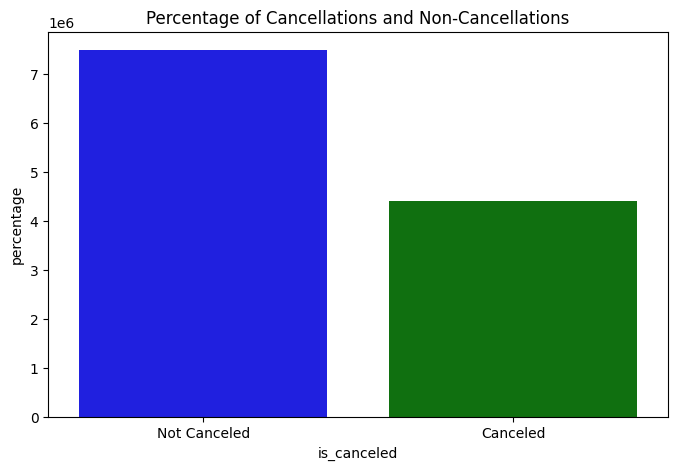

In [41]:
percentage = df['is_canceled'].value_counts()*100

plt.figure(figsize =(8,5))
sns.barplot(x= percentage.index, y= percentage, palette=['blue', 'green'])

plt.title('Percentage of Cancellations and Non-Cancellations')
plt.xlabel('is_canceled')
plt.ylabel('percentage')
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.show()

In [46]:
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']


# Split the data

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state= 42, stratify=y)

# Decision Tree Model Building

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()


# DT Hyperparameter Tuning

In [87]:

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [13, 14, 15],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': [{0: 1, 1: w} for w in [1, 2, 3]]
}

from sklearn.model_selection import RandomizedSearchCV
dt =RandomizedSearchCV(DecisionTreeClassifier(), param_grid_dt,cv = 5,return_train_score = False,n_iter =2)
dt.fit(x_train,y_train)

,estimator,DecisionTreeClassifier()
,param_distributions,"{'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, ...], 'criterion': ['gini', 'entropy'], 'max_depth': [13, 14, ...], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,2
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [62]:
dt.score(x_test, y_test)*100

82.41167176522002

In [60]:
dt.predict(x_test)

array([0, 0, 0, ..., 0, 1, 0], shape=(29747,))

# DT model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score

In [63]:
cf = confusion_matrix(y_test, clf.predict(x_test))
cf

array([[17222,  1496],
       [ 3736,  7293]])

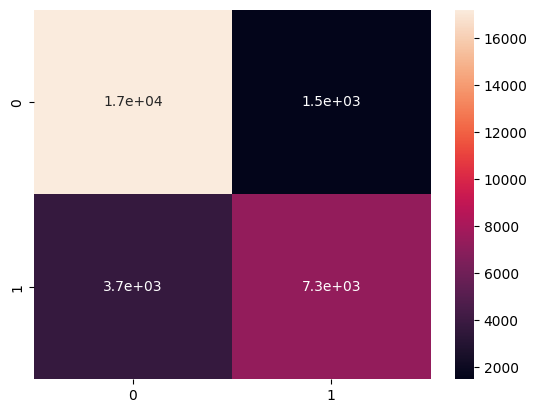

In [64]:
sns.heatmap(cf, annot =True)
plt.show()

In [65]:
precision_score(y_test, clf.predict(x_test))*100

82.97872340425532

In [66]:
recall_score(y_test, clf.predict(x_test))*100

66.12566869163116

In [67]:
f1_score(y_test, clf.predict(x_test))*100

73.59975779594308

# Random Forest Model Building

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# RF Hyperparameter Tuning

In [89]:
param_grid_rf = {
    'n_estimators': [50, 100],
    'criterion': ['entropy'],
    'max_depth': [16, 18],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': [{0: 1, 1: w} for w in [1, 2, 3]]
}

from sklearn.model_selection import RandomizedSearchCV
rf =RandomizedSearchCV(RandomForestClassifier(), param_grid_rf,cv = 5,return_train_score = False,n_iter =2)
rf.fit(x_train,y_train)

,estimator,RandomForestClassifier()
,param_distributions,"{'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, ...], 'criterion': ['entropy'], 'max_depth': [16, 18], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,2
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [90]:
rf.score(x_test, y_test)*100

78.11207852892728

In [91]:
rf.predict(x_test)

array([0, 0, 0, ..., 0, 1, 0], shape=(29747,))

# RF model Evaluation

In [92]:
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score

In [93]:
cf = confusion_matrix(y_test, clf.predict(x_test))
cf

array([[15923,  2795],
       [ 2166,  8863]])

In [94]:
precision_score(y_test, clf.predict(x_test))*100

76.02504717790359

In [95]:
recall_score(y_test, clf.predict(x_test))*100

80.36086680569407

In [96]:
f1_score(y_test, clf.predict(x_test))*100

78.1328514127033

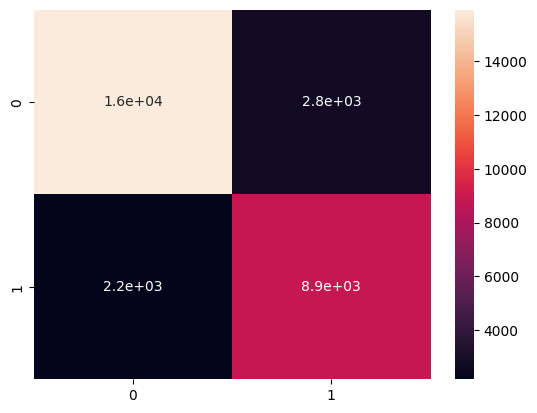

In [97]:
sns.heatmap(cf, annot =True)
plt.show()

# Final results and comparision 

In [98]:
# Results
results = {
    'Model': ['Decision Tree', 'Random Forest'],
    'Precision': [82.97872340425532, 76.02504717790359],
    'Recall': [66.12566869163116, 80.36086680569407],
    'F1-Score': [73.59975779594308, 78.1328514127033]
}

df_results = pd.DataFrame(results)
print(df_results)

           Model  Precision     Recall   F1-Score
0  Decision Tree  82.978723  66.125669  73.599758
1  Random Forest  76.025047  80.360867  78.132851


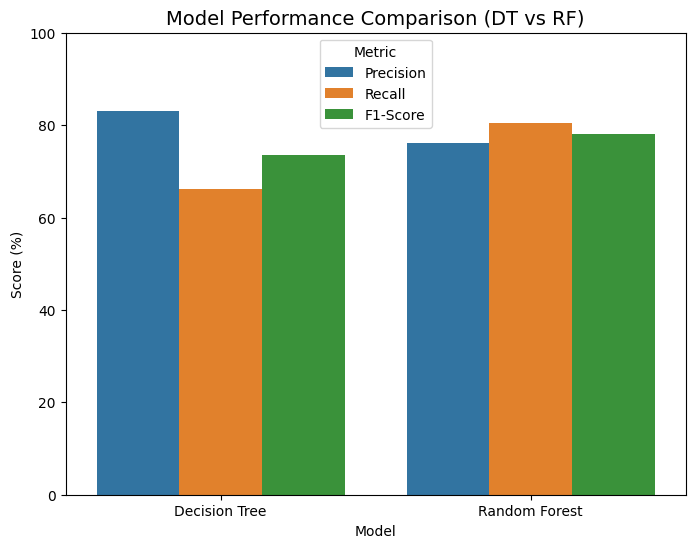

In [99]:
plt.figure(figsize=(8,6))
df_plot = df_results.melt(id_vars="Model", var_name="Metric", value_name="Score")

sns.barplot(x="Model", y="Score", hue="Metric", data=df_plot)

plt.title("Model Performance Comparison (DT vs RF)", fontsize=14)
plt.ylabel("Score (%)")
plt.xlabel("Model")
plt.ylim(0, 100)  # since these are percentages
plt.legend(title="Metric")
plt.show()

In [100]:
# Predictions
y_pred_dt = dt.predict(x_test)
y_pred_rf = rf.predict(x_test)

# Confusion matrices
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Decision Tree Confusion Matrix:\n", cm_dt)
print("Random Forest Confusion Matrix:\n", cm_rf)

Decision Tree Confusion Matrix:
 [[17177  1541]
 [ 3652  7377]]
Random Forest Confusion Matrix:
 [[13470  5248]
 [ 1263  9766]]


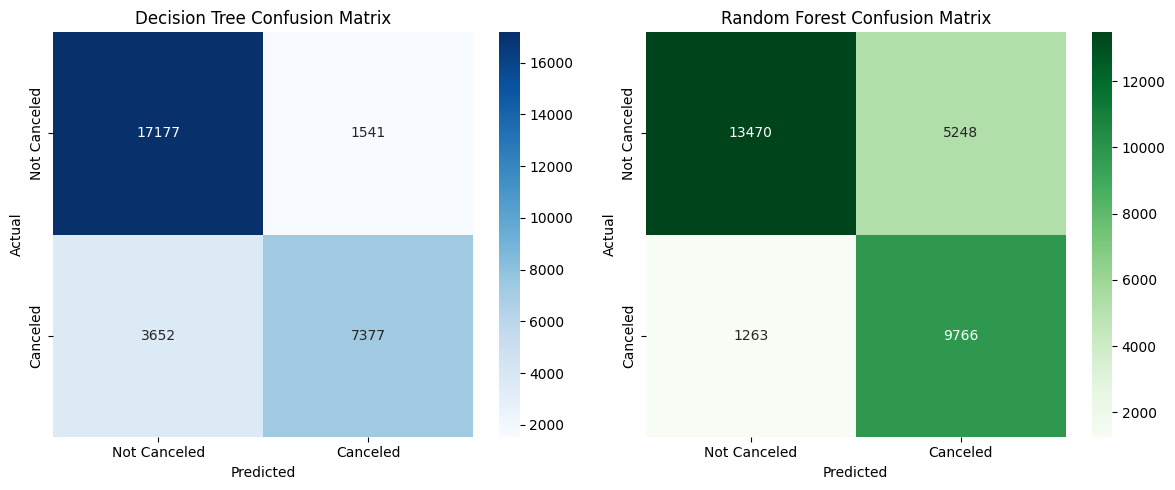

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Decision Tree
sns.heatmap(cm_dt, annot=True, fmt='d', cmap="Blues", ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].xaxis.set_ticklabels(["Not Canceled", "Canceled"])
axes[0].yaxis.set_ticklabels(["Not Canceled", "Canceled"])

# Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
axes[1].xaxis.set_ticklabels(["Not Canceled", "Canceled"])
axes[1].yaxis.set_ticklabels(["Not Canceled", "Canceled"])

plt.tight_layout()
plt.show()